In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import copy
import matplotlib.colors
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [2]:
s01_umap = np.load("../Embeddings/s01_umap.npy")
s01_tsne = np.load("../Embeddings/s01_tsne.npy")
s01_pca = np.load("../Embeddings/s01_pca.npy")
s01_2layer = np.load("../Embeddings/s01_2layer.npy")
s01_6layer = np.load("../Embeddings/s01_6layer.npy")
s01_vae = np.load("../Embeddings/s01_vae.npy")
PopData = pd.read_csv("../SamusikData/population_assignments01.csv")
Assignments = np.array(PopData.Population)

In [3]:
s01_labels = PopData["Population"].to_numpy()
non_zero = np.where(s01_labels > 0)
s01_pca = s01_pca[non_zero]
s01_umap = s01_umap[non_zero]
s01_tsne = s01_tsne[non_zero]
s01_2layer = s01_2layer[non_zero]
s01_6layer = s01_6layer[non_zero]
s01_vae = s01_vae[non_zero]
y = Assignments[non_zero]

In [4]:
np.random.seed(1)

In [5]:
def run_crossval(X, y):
    cv = StratifiedKFold(n_splits=5)  

    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    classifier = SVC(kernel='rbf', random_state = 1)
    for i, (train, test) in enumerate(cv.split(X, y)):
        X_train = np.array(X[train])
        X_test = np.array(X[test])
        y_train = np.array(y[train])
        y_test = np.array(y[test])

        classifier.fit(X_train, y_train)
        acc = metrics.accuracy_score(y_test, classifier.predict(X_test))
        print("Fold " + str(i+1) + ": " + str(acc))
        accs.append(acc)
    print("Mean Accuracy: " + str(np.mean(accs)))
    print("Accuracy SD: " + str(np.std(accs)))
    return np.mean(accs), np.std(accs)

### PCA Accuracy

In [6]:
X_pca = s01_pca[:,0:2]

In [7]:
mean_accs_pca, std_accs_pca = run_crossval(X_pca, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.6586741889985895
Fold 2: 0.6540667606958157
Fold 3: 0.6541607898448519
Fold 4: 0.6498025202181681
Fold 5: 0.6545984577769419
Mean Accuracy: 0.6542605435068733
Accuracy SD: 0.002811260457305554


### UMAP Accuracy

In [8]:
X_umap = s01_umap[:,0:2]

In [9]:
mean_accs_umap, std_accs_umap = run_crossval(X_umap, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.9498824635637048
Fold 2: 0.9502585801598495
Fold 3: 0.9473436765397273
Fold 4: 0.9466804589053978
Fold 5: 0.9489373706977619
Mean Accuracy: 0.9486205099732883
Accuracy SD: 0.0013978771964848781


### tSNE Accuracy

In [10]:
X_tsne = s01_tsne[:,0:2]

In [11]:
mean_accs_tsne, std_accs_tsne = run_crossval(X_tsne, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.94950634696756
Fold 2: 0.948095909732017
Fold 3: 0.944428772919605
Fold 4: 0.9447056610870792
Fold 5: 0.9480910287756253
Mean Accuracy: 0.9469655438963773
Accuracy SD: 0.0020269386119309996


### 2 Layer AE Accuracy

In [12]:
X_2layer = s01_2layer[:,0:2]

In [13]:
mean_accs_2layer, std_accs_2layer = run_crossval(X_2layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.6453220498354489
Fold 2: 0.6426892336624354
Fold 3: 0.6449459332393042
Fold 4: 0.6429377468497273
Fold 5: 0.6426556328756817
Mean Accuracy: 0.6437101192925195
Accuracy SD: 0.0011727117676299484


### 6 Layer AE Accuracy

In [14]:
X_6layer = s01_6layer[:,0:2]

In [15]:
mean_accs_6layer, std_accs_6layer = run_crossval(X_6layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.8990126939351198
Fold 2: 0.8971321109543958
Fold 3: 0.8979783732957217
Fold 4: 0.8951476396464172
Fold 5: 0.8971224374647357
Mean Accuracy: 0.8972786510592782
Accuracy SD: 0.0012715032233253177


### VAE Accuracy

In [16]:
X_vae = s01_vae[:,0:2]

In [17]:
mean_accs_vae, std_accs_vae = run_crossval(X_vae, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.8855665256229431
Fold 2: 0.8831217677480019
Fold 3: 0.8821814762576399
Fold 4: 0.8803836750047019
Fold 5: 0.8811359789354899
Mean Accuracy: 0.8824778847137553
Accuracy SD: 0.0018015866020700435


### Figure Generation

In [18]:
# Create lists for the plot
Methods = ['PCA', 'UMAP', 'tSNE', '2 Layer AE', '6 Layer AE', 'VAE']
x_pos = np.arange(len(Methods))
Means = [mean_accs_pca, mean_accs_umap, mean_accs_tsne, mean_accs_2layer, mean_accs_6layer, mean_accs_vae]
Errors = [std_accs_pca, std_accs_umap, std_accs_tsne, std_accs_2layer, std_accs_6layer, std_accs_vae]

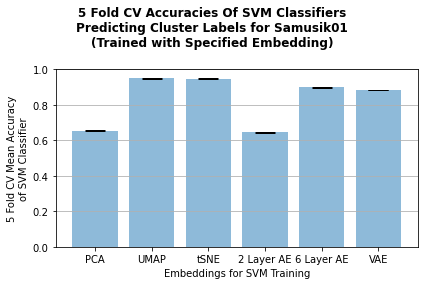

In [19]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=Errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('5 Fold CV Mean Accuracy\nof SVM Classifier')
ax.set_xlabel('Embeddings for SVM Training')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.suptitle('5 Fold CV Accuracies Of SVM Classifiers\nPredicting Cluster Labels for Samusik01\n(Trained with Specified Embedding)', fontweight = 'bold')
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.tight_layout()
plt.savefig('../Figures/SVMClassiferAccuracies_s01.png')
plt.show()

# Levine

In [20]:
import FlowCal

In [21]:
data_dir = "../LevineData/"
levine_fn = data_dir + "Levine_32dim_notransform.fcs"
levine = FlowCal.io.FCSData(levine_fn)

labels = np.array(levine[:, 39])
labels[np.isnan(labels)] = 0
y = labels[labels > 0]

In [22]:
# Load other embeddings
levine_pca = np.load("../Embeddings/levine_pca.npy")
levine_tsne = np.load("../Embeddings/levine_tsne.npy")
levine_umap = np.load("../Embeddings/levine_umap.npy")
levine_2layer = np.load("../Embeddings/levine_2layer.npy")
levine_6layer = np.load("../Embeddings/levine_6layer.npy")
levine_vae = np.load("../Embeddings/levine_vae.npy")

## PCA Accuracy

In [23]:
X_pca = levine_pca[:,0:2]
mean_accs_pca, std_accs_pca = run_crossval(X_pca, np.array(y))

Fold 1: 0.7243845083265346
Fold 2: 0.7359984642702885
Fold 3: 0.7378701348562653
Fold 4: 0.786629553198637
Fold 5: 0.7986657707813399
Mean Accuracy: 0.7567096862866131
Accuracy SD: 0.02994766103661132


## UMAP Accuracy

In [24]:
X_umap = levine_umap[:,0:2]
mean_accs_umap, std_accs_umap = run_crossval(X_umap, np.array(y))

Fold 1: 0.9790276911263618
Fold 2: 0.9784997840380093
Fold 3: 0.9809473532658252
Fold 4: 0.9820991505495033
Fold 5: 0.9790746784411596
Mean Accuracy: 0.9799297314841718
Accuracy SD: 0.0013661241073773694


## tSNE Accuracy

In [25]:
X_tsne = levine_tsne[:,0:2]
mean_accs_tsne, std_accs_tsne = run_crossval(X_tsne, np.array(y))

Fold 1: 0.97610020636368
Fold 2: 0.9756682823823007
Fold 3: 0.9780198685031435
Fold 4: 0.9811873110332582
Fold 5: 0.9751871760414667
Mean Accuracy: 0.9772325688647697
Accuracy SD: 0.002198758521281193


## 2 Layer Accuracy

In [26]:
X_2layer = levine_2layer[:,0:2]
mean_accs_2layer, std_accs_2layer = run_crossval(X_2layer, np.array(y))

Fold 1: 0.7191534289964966
Fold 2: 0.7287037481403273
Fold 3: 0.7316792244564957
Fold 4: 0.7779910735710515
Fold 5: 0.7907947782683816
Mean Accuracy: 0.7496644506865506
Accuracy SD: 0.028940778390975974


## 6 Layer Accuracy

In [27]:
X_6layer = levine_6layer[:,0:2]
mean_accs_6layer, std_accs_6layer = run_crossval(X_6layer, np.array(y))

Fold 1: 0.9441378317416135
Fold 2: 0.9457695445601574
Fold 3: 0.948025147574027
Fold 4: 0.9553198637039881
Fold 5: 0.9494624688039931
Mean Accuracy: 0.9485429712767559
Accuracy SD: 0.003850637301444998


## VAE Accuracy

In [28]:
X_vae = levine_vae[:,0:2]
mean_accs_vae, std_accs_vae = run_crossval(X_vae, np.array(y))

Fold 1: 0.9651581321687382
Fold 2: 0.9673177520756346
Fold 3: 0.9691894226616116
Fold 4: 0.9741805442242165
Fold 5: 0.9662123248224227
Mean Accuracy: 0.9684116351905248
Accuracy SD: 0.003178178505567202


In [29]:
# Create lists for the plot
Methods = ['PCA', 'UMAP', 'tSNE', '2 Layer AE', '6 Layer AE', 'VAE']
x_pos = np.arange(len(Methods))
Means = [mean_accs_pca, mean_accs_umap, mean_accs_tsne, mean_accs_2layer, mean_accs_6layer, mean_accs_vae]
Errors = [std_accs_pca, std_accs_umap, std_accs_tsne, std_accs_2layer, std_accs_6layer, std_accs_vae]

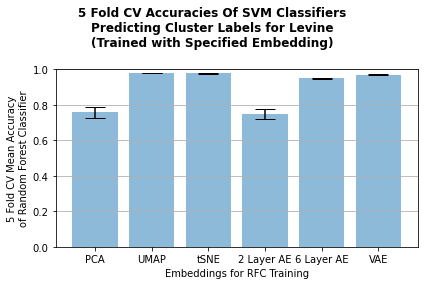

In [30]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=Errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('5 Fold CV Mean Accuracy\nof Random Forest Classifier')
ax.set_xlabel('Embeddings for RFC Training')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.suptitle('5 Fold CV Accuracies Of SVM Classifiers\nPredicting Cluster Labels for Levine\n(Trained with Specified Embedding)', fontweight = 'bold')
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.tight_layout()
plt.savefig('../Figures/SVMClassiferAccuracies_levine.png')
plt.show()